In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [2]:
nlp=spacy.load("en_core_web_sm")

In [3]:
df=pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Data Cleaning

In [4]:
#this func removes STOPWORDS and PUNCTUATION from the String

def text_process(message):
    doc=nlp(message)
    final=[token.lemma_ for token in doc if token.is_stop== False and token.text.isalpha()== True ]
    return " ".join(final)

In [5]:
# toxic['text length'] = toxic['comment_text'].apply(len)  #adding a new feature

In [6]:
# processed=df["comment_text"].apply(text_process)

In [7]:
# df["filtered"]=processed

**exporting the new processed csv file**

In [8]:
# df.to_csv(r'/Users/sudhanshukumar/Documents/Development/Machine Learning/Toxic Comments Classfication/filtered_text.csv', index = False)

### Loading new dataframe with filtered text

In [9]:
df=pd.read_csv("filtered_text.csv")
df["filtered"]=df["filtered"].apply(lambda x: np.str_(x))

## Data Visualisation

/Users/sudhanshukumar/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text length', ylabel='Density'>

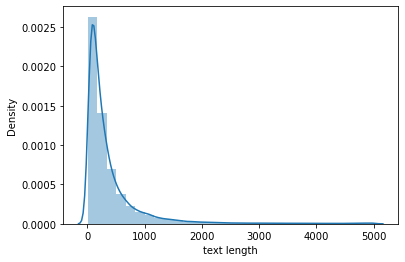

In [10]:
sns.distplot(a=df['text length'],bins=30)

/Users/sudhanshukumar/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/sudhanshukumar/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/sudhanshukumar/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

<AxesSubplot:xlabel='identity_hate', ylabel='count'>

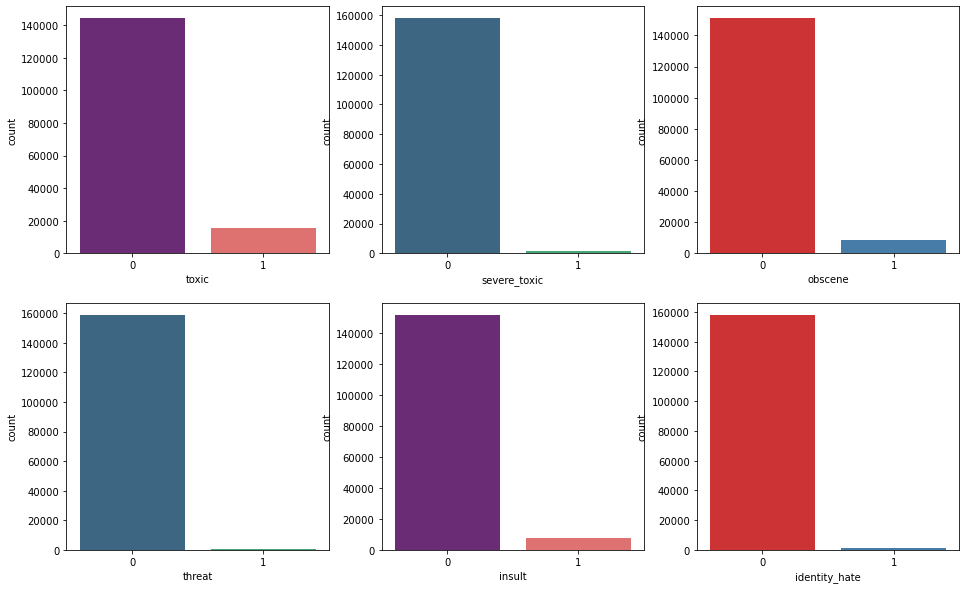

In [11]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(df['toxic'],palette= 'magma',ax=ax1)
sns.countplot(df['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(df['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(df['threat'], palette= 'viridis',ax = ax4)
sns.countplot(df['insult'], palette = 'magma',ax=ax5)
sns.countplot(df['identity_hate'], palette = 'Set1', ax = ax6)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

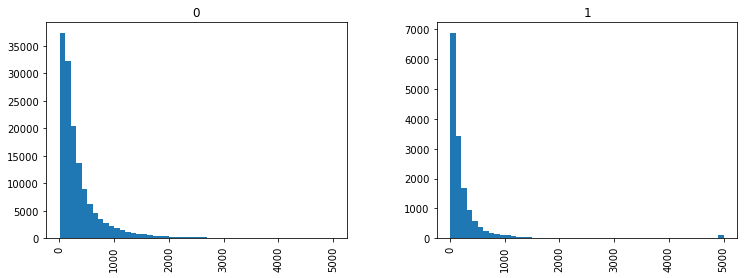

In [12]:
df.hist(column='text length', by='toxic', bins=50,figsize=(12,4))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

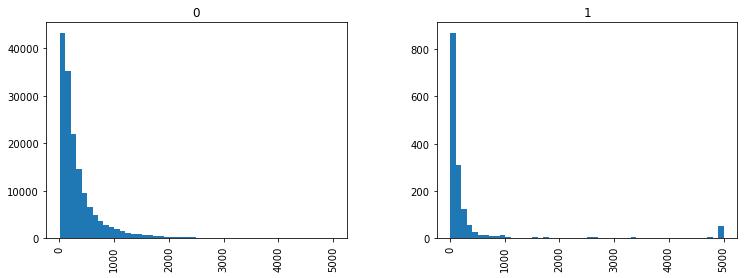

In [13]:
df.hist(column='text length', by='severe_toxic', bins=50,figsize=(12,4))

## word2vec

In [14]:
# nlp_lg=spacy.load("en_core_web_lg")

# with nlp_lg.disable_pipes():
#      doc_vectors = np.array([nlp_lg(str(text)).vector for text in df.filtered])
    
# doc_vectors.shape

In [15]:
#to save doc_vectors in compressed npy format(uploaded in google drive)
# np.savez_compressed('w2v',doc_vectors,delimiter=",")


In [ ]:
#to load the compressed .npz file back.
# w2vectors = np.load('w2v.npz')

## Using Logistic Regression

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

**max_df = 0.80 means "ignore terms that appear in more than 80% of the documents".**

In [17]:
tfidf=TfidfVectorizer(max_df=0.8)

In [18]:
X=df["filtered"]
X_vec=tfidf.fit_transform(X)

In [19]:
#Toxic Labels
y=df["toxic"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_toxic=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_toxic.predict(X_test)

print(confusion_matrix(y_test,predictions),"\n")
print(classification_report(y_test,predictions))

[[28698   161]
 [ 1307  1749]] 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.92      0.57      0.70      3056

    accuracy                           0.95     31915
   macro avg       0.94      0.78      0.84     31915
weighted avg       0.95      0.95      0.95     31915



In [20]:
#Severe_toxic Labels
y=df["severe_toxic"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_stoxic=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_stoxic.predict(X_test)

print(confusion_matrix(y_test,predictions),"\n")
print(classification_report(y_test,predictions))

[[31543    51]
 [  242    79]] 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.61      0.25      0.35       321

    accuracy                           0.99     31915
   macro avg       0.80      0.62      0.67     31915
weighted avg       0.99      0.99      0.99     31915



In [21]:
#Obscene Labels
y=df["obscene"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_obscene=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_obscene.predict(X_test)

print(confusion_matrix(y_test,predictions),"\n")
print(classification_report(y_test,predictions))

[[30117    83]
 [  711  1004]] 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30200
           1       0.92      0.59      0.72      1715

    accuracy                           0.98     31915
   macro avg       0.95      0.79      0.85     31915
weighted avg       0.97      0.98      0.97     31915



In [22]:
#Threat Labels
y=df["threat"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_threat=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_threat.predict(X_test)

print(confusion_matrix(y_test,predictions),"\n")
print(classification_report(y_test,predictions))

[[31833     8]
 [   65     9]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31841
           1       0.53      0.12      0.20        74

    accuracy                           1.00     31915
   macro avg       0.76      0.56      0.60     31915
weighted avg       1.00      1.00      1.00     31915



In [23]:
#Insult Labels
y=df["insult"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_insult=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_insult.predict(X_test)

print(confusion_matrix(y_test,predictions),"\n")
print(classification_report(y_test,predictions))

[[30154   147]
 [  873   741]] 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30301
           1       0.83      0.46      0.59      1614

    accuracy                           0.97     31915
   macro avg       0.90      0.73      0.79     31915
weighted avg       0.96      0.97      0.96     31915



In [24]:
#Identity_hate Labels
y=df["identity_hate"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_ihate=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_ihate.predict(X_test)

print(confusion_matrix(y_test,predictions),"\n")
print(classification_report(y_test,predictions))

[[31607    14]
 [  258    36]] 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31621
           1       0.72      0.12      0.21       294

    accuracy                           0.99     31915
   macro avg       0.86      0.56      0.60     31915
weighted avg       0.99      0.99      0.99     31915



### Working with Test data

In [25]:
test_df=pd.read_csv("test.csv")
test = test_df['comment_text']
test_vec = tfidf.transform(test)

In [26]:
prob_toxic = lr_toxic.predict_proba(test_vec)
prob_stoxic = lr_stoxic.predict_proba(test_vec)
prob_obscene = lr_obscene.predict_proba(test_vec)
prob_threat = lr_threat.predict_proba(test_vec)
prob_insult = lr_insult.predict_proba(test_vec)
prob_ihate = lr_ihate.predict_proba(test_vec)

In [27]:
prob_toxic[0]

array([0.00819895, 0.99180105])

In [28]:
df1 = pd.DataFrame(prob_toxic[:,1],columns={'toxic'})
df2 = pd.DataFrame(prob_stoxic[:,1],columns={'severe_toxic'})
df3 = pd.DataFrame(prob_obscene[:,1],columns={'obscene'})
df4 = pd.DataFrame(prob_threat[:,1],columns={'threat'})
df5 = pd.DataFrame(prob_insult[:,1],columns={'insult'})
df6 = pd.DataFrame(prob_ihate[:,1],columns={'identity_hate'})

In [29]:
df.iloc[0][1]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [30]:
df1 = pd.DataFrame(prob_toxic[:,1],columns={'toxic'})
df2 = pd.DataFrame(prob_stoxic[:,1],columns={'severe_toxic'})
df3 = pd.DataFrame(prob_obscene[:,1],columns={'obscene'})
df4 = pd.DataFrame(prob_threat[:,1],columns={'threat'})
df5 = pd.DataFrame(prob_insult[:,1],columns={'insult'})
df6 = pd.DataFrame(prob_ihate[:,1],columns={'identity_hate'})

In [31]:
df7 = pd.concat([test_df['id'],df1,df2,df3,df4,df5,df6],axis=1)

In [32]:
df7.set_index('id',inplace=True)
# df7.to_csv(path_or_buf='submission.csv')

In [33]:
df7.head()  

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,0.991801,0.129658,0.983492,0.022613,0.864956,0.140699
0000247867823ef7,0.011239,0.003144,0.007374,0.001955,0.008917,0.003827
00013b17ad220c46,0.047377,0.004497,0.018454,0.001974,0.022510,0.005224
00017563c3f7919a,0.003038,0.001921,0.003114,0.001254,0.002515,0.000978
00017695ad8997eb,0.030508,0.002648,0.011630,0.001857,0.013397,0.003926


 ### All over Score got on kaggle:  _96.587 %_